In [54]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

import json
ans=[0]*5

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the dataset and define the feature as well as the target datasets / columns 
df = pd.read_csv("zoo.csv")
df.head()
#We drop the animal names since this is not a good feature to split the data on. 


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.drop(columns=["animal_name"], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [7]:
#Write a function to find the entropy on a split "target_col"
def entropy(target_col):
    classes = df["class_type"].unique()

    split_targets = df[target_col].unique()
    tot_sizes = [len(df.loc[df[target_col] == i]) for i in split_targets]
    split_values = [0 for i in range(len(split_targets))]
    for i in range(len(split_targets)):
        for j in classes:
            temp = len(df.loc[(df[target_col] == split_targets[i]) & (df["class_type"] == j)])/tot_sizes[i]
            if(temp != 0): split_values[i] -= temp*np.log(temp)/np.log(len(classes))

    entropy = sum([tot_sizes[i]*split_values[i]/len(df) for i in range(len(split_targets))])
    return entropy

In [8]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']

In [9]:
#Find the entropy of the feature "toothed"

ans[0] = entropy('toothed')
ans[0]

0.5431680607321205

In [10]:
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(data, split_attribute_name, target_name="class_type"):       
    #Calculate the entropy of the total dataset  
    counts = data[target_name].value_counts()
    root_entropy = 0
    for class_count in counts:
        root_entropy -= (class_count/len(data))*np.log(class_count/len(data))/np.log(len(counts))

    #Calculate the values and the corresponding counts for the split attribute   
    classes = data[target_name].unique()

    split_targets = data[split_attribute_name].unique()
    tot_sizes = [len(data.loc[data[split_attribute_name] == i]) for i in split_targets]
    split_values = [0 for i in range(len(split_targets))]
    for i in range(len(split_targets)):
        for j in classes:
            temp = len(data.loc[(data[split_attribute_name] == split_targets[i]) & (data["class_type"] == j)])/tot_sizes[i]
            if(temp != 0): split_values[i] -= temp*np.log(temp)/np.log(len(classes))

    #Calculate the weighted entropy 
    split_entropy = sum([tot_sizes[i]*split_values[i]/len(data) for i in range(len(split_targets))])

    #Calculate the information gain  
    return root_entropy-split_entropy

In [11]:
#Find the information gain having split attribute "hair" and the target feature name "milk"

ans[1] = InfoGain(df, "hair", "milk")
ans[1]

0.8237296133076184

In [12]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
cols = [col for col in df.columns if col not in ['milk', 'class_type']]

for col in cols:
    print("Information gain with split attribute: milk and target feature:", col, " is:", InfoGain(df,"milk",col))

Information gain with split attribute: milk and target feature: hair  is: 0.9840304711717018
Information gain with split attribute: milk and target feature: feathers  is: 0.7179499765002912
Information gain with split attribute: milk and target feature: eggs  is: 0.9794662187017298
Information gain with split attribute: milk and target feature: airborne  is: 0.7910662980902586
Information gain with split attribute: milk and target feature: aquatic  is: 0.9396846718728562
Information gain with split attribute: milk and target feature: predator  is: 0.9914266810680206
Information gain with split attribute: milk and target feature: toothed  is: 0.9685867165455516
Information gain with split attribute: milk and target feature: backbone  is: 0.6761627418829197
Information gain with split attribute: milk and target feature: breathes  is: 0.7374895672137456
Information gain with split attribute: milk and target feature: venomous  is: 0.3993820824245975
Information gain with split attribute: m

In [13]:
#Import Decision Tree Classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier
#Split the given data into 80 percent training data and 20 percent testing data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)


In [14]:
#Fit the given data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
preds = decision_tree.predict(X_test)
print("True labels:", y_test.values)
print("Predicted labels:", preds)

True labels: [2 2 2 4 4 4 3 6 1 3 4 1 2 7 4 1 1 2 1 7 7]
Predicted labels: [2 2 2 4 4 4 5 6 1 3 4 1 2 7 4 1 1 2 1 7 7]


In [17]:
#Make a prediction on the test data and return the percentage of accuracy
accuracy = sum([1 for i in range(len(y_test)) if y_test.values[i] == preds[i]])/len(y_test)
ans[2] = accuracy
accuracy 

0.9523809523809523

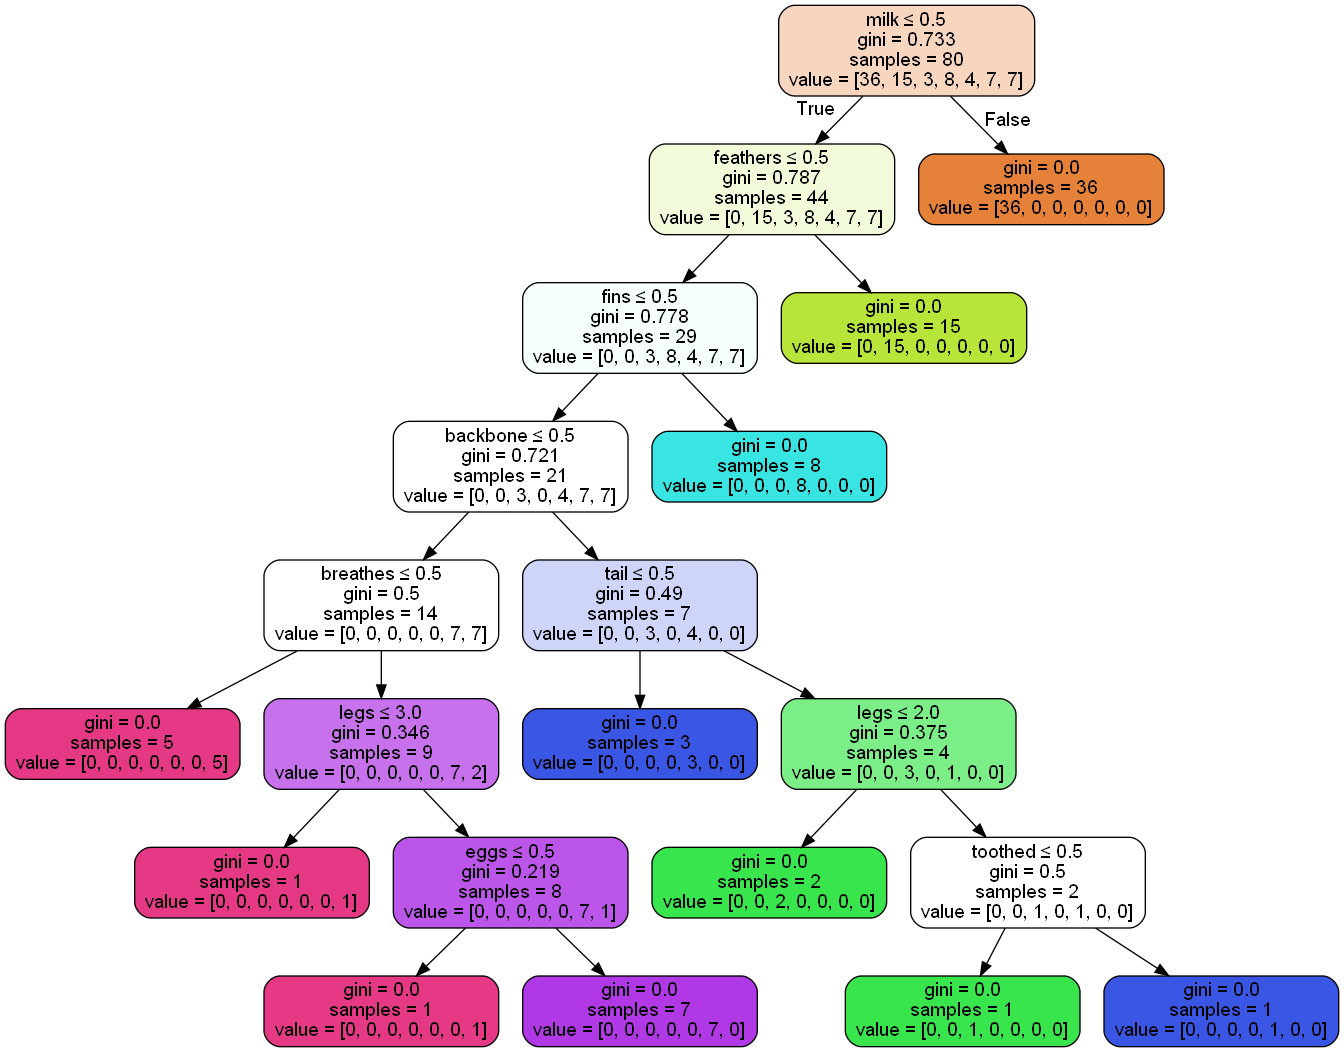

In [18]:
#Run this cell to visualize the decision tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
#Use sklearn to make a classification report and a confusion matrix
target_names = [i+1 for i in range(len(df["class_type"].unique()))]
print(classification_report(y_test.values, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         5
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



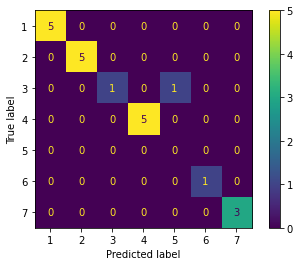

In [49]:
cm = confusion_matrix(y_test.values, preds, labels=target_names)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot();
plt.show()

In [64]:
metrics = precision_recall_fscore_support(y_test.values, preds)
recall = metrics[1][2]
f1_score = metrics[2][2]

In [65]:
#Find the recall,f1-score for class type '3'
ans[3] = [recall, f1_score]
ans[3]

[0.5, 0.6666666666666666]

In [67]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
mean_absolute_error = sum([abs(y_test.values[i]-preds[i]) for i in range(len(y_test))])/len(y_test)
mean_squared_error = sum([(y_test.values[i]-preds[i])**2 for i in range(len(y_test))])/len(y_test)
rmse = np.sqrt(mean_squared_error)
rmse

0.4364357804719847

In [68]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4] = [mean_absolute_error, rmse]
ans[4]

[0.09523809523809523, 0.4364357804719847]

In [69]:
##do not change this code
import json
ans = [str(item) for item in ans]

filename = "group29_152amarnath@gmail.com_Amarnath_Reddy_DecisionTrees"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LinearRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [70]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'group29_152amarnath@gmail.com_Amarnath_Reddy_DecisionTrees',
 'status': 'Success'}
